In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1. Cargar los datos (ajusta la ruta según corresponda)
wpt_df = pd.read_csv('/content/drive/MyDrive/WPT_Cordoba_E2025_TimeSeriesNDVI_landsat.csv')
wpt_df.columns

<ipython-input-3-4f8fd6197b39>:2: DtypeWarning: Columns (114) have mixed types. Specify dtype option on import or set low_memory=False.
  wpt_df = pd.read_csv('/content/drive/MyDrive/WPT_Cordoba_E2025_TimeSeriesNDVI_landsat.csv')


Index(['system:index', '2024-11-01T14:01:53', '2024-11-01T14:02:17',
       '2024-11-01T14:02:41', '2024-11-01T14:03:05', '2024-11-08T14:07:46',
       '2024-11-08T14:08:34', '2024-11-08T14:08:58', '2024-11-08T14:09:22',
       '2024-11-10T13:56:12',
       ...
       'FENOLOGIA', 'GlobalID', 'OBSERVACIO', 'depto', 'fid', 'id_depto',
       'id_prov', 'landcover', 'provincia', '.geo'],
      dtype='object', length=124)

In [ ]:
wpt_copy = wpt_df.copy()
wpt_copy.drop(columns=['.geo','ESTADO_GRA','FENOLOGIA','GlobalID','OBSERVACIO','COBERTURAS','fid', 'provincia', 'system:index'], inplace = True)
wpt_copy['id']= np.arange(1,len(wpt_copy)+1)
wpt_copy['id']= wpt_copy['id'].astype("category")
wpt_copy.head(3)

,2024-11-01T14:01:53,2024-11-01T14:02:17,2024-11-01T14:02:41,2024-11-01T14:03:05,2024-11-08T14:07:46,2024-11-08T14:08:34,2024-11-08T14:08:58,2024-11-08T14:09:22,2024-11-10T13:56:12,2024-11-15T14:14:19,...,2025-04-19T13:55:40,2025-04-19T13:56:04,2025-04-19T13:56:28,2025-04-24T14:14:07,2025-04-26T14:02:34,depto,id_depto,id_prov,landcover,id
0,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,...,No data,No data,No data,No data,No data,NaN,NaN,NaN,17,1
1,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,...,No data,No data,No data,No data,No data,NaN,NaN,NaN,17,2
2,No data,No data,No data,No data,No data,No data,No data,No data,No data,No data,...,No data,No data,No data,No data,No data,NaN,NaN,NaN,17,3


In [ ]:
df_graphs = pd.melt(wpt_copy, id_vars=('landcover','depto','id'), value_vars= wpt_copy[wpt_copy.columns[1:-4]])
df_graphs.dropna(axis= 0, inplace=True)

# Filtrar y eliminar filas donde 'value' es 'No data'
df_graphs = df_graphs[df_graphs['value'] != 'No data']
#print(df_graphs.head(5))
df_graphs

,landcover,depto,id,variable,value
481,1,GENERAL SAN MARTIN,482,2024-11-01T14:02:17,0.30372778660361327
487,1,GENERAL SAN MARTIN,488,2024-11-01T14:02:17,0.3070569482683669
488,1,GENERAL SAN MARTIN,489,2024-11-01T14:02:17,0.12774235736472128
490,1,GENERAL SAN MARTIN,491,2024-11-01T14:02:17,0.26474164133738604
495,1,GENERAL SAN MARTIN,496,2024-11-01T14:02:17,0.15595208115983739
...,...,...,...,...,...
1116052,9,RIO CUARTO,10030,2025-04-26T14:02:34,0.19931374651511902
1116056,9,RIO CUARTO,10034,2025-04-26T14:02:34,0.25680393153702763
1116147,9,UNION,10125,2025-04-26T14:02:34,0.3316370412844037
1116148,9,UNION,10126,2025-04-26T14:02:34,0.2625029271066805


In [ ]:
print(df_graphs[['landcover', 'value', 'variable']].isnull().sum())

landcover    0
value        0
variable     0
dtype: int64


In [ ]:
# Identificar los valores que pandas no puede convertir a fechas
invalid_dates = df_graphs[~pd.to_datetime(df_graphs['variable'], errors='coerce').notna()]
print(invalid_dates)

Empty DataFrame
Columns: [landcover, depto, id, variable, value]
Index: []


In [ ]:
# Eliminar valores no válidos que no pueden convertise a fecha
df_graphs = df_graphs[pd.to_datetime(df_graphs['variable'], errors='coerce').notna()]
# 5. Convertir fechas
df_graphs['variable'] = pd.to_datetime(df_graphs['variable'], errors='coerce')
df_graphs.dropna(subset=['variable'], inplace=True)

In [ ]:
df_graphs['value'] = df_graphs['value'].astype(float)
df_graphs['id'] = df_graphs['id'].astype(int)  # O usa .astype(int) si son números
df_graphs['landcover'] = df_graphs['landcover'].astype(int)  # O usa .astype(int) si son números

In [ ]:
nulos = df_graphs.isnull().sum()
print(f"Valores 'nulos' en 'value': {nulos}")

Valores 'nulos' en 'value': landcover    0
depto        0
id           0
variable     0
value        0
dtype: int64


In [ ]:
# 7. Calcular diferencias y tasa de cambio
df_resultado = df_graphs.sort_values(by=['id', 'variable']).copy()
df_resultado['diff_ndvi'] = df_resultado.groupby('id')['value'].diff()
df_resultado['diff_dias'] = df_resultado.groupby('id')['variable'].diff().dt.days

# Eliminar filas con NaN en diferencias antes de calcular tasa de cambio
df_resultado.dropna(subset=['diff_ndvi', 'diff_dias'], inplace=True)
df_resultado['tasa_cambio'] = df_resultado['diff_ndvi'] / df_resultado['diff_dias']*100

# Calcular valor absoluto de la tasa de cambio
df_resultado['tasa_cambio_abs'] = df_resultado['tasa_cambio'].abs()
df_resultado

,landcover,depto,id,variable,value,diff_ndvi,diff_dias,tasa_cambio,tasa_cambio_abs
101477,1,CAPITAL,8,2024-11-24 14:08:43,0.201041,0.087331,16.0,0.545817,0.545817
202947,1,CAPITAL,8,2024-12-10 14:08:33,0.106924,-0.094117,15.0,-0.627444,0.627444
345005,1,CAPITAL,8,2024-12-26 14:08:36,0.237180,0.130256,16.0,0.814099,0.814099
487063,1,CAPITAL,8,2025-01-11 14:08:39,0.362480,0.125300,16.0,0.783126,0.783126
598680,1,CAPITAL,8,2025-01-27 14:08:35,0.558823,0.196343,15.0,1.308951,1.308951
...,...,...,...,...,...,...,...,...,...
304409,9,SAN JUSTO,10147,2024-12-19 14:02:24,0.281614,-0.103526,15.0,-0.690172,0.690172
446467,9,SAN JUSTO,10147,2025-01-04 14:02:25,0.270177,-0.011437,16.0,-0.071483,0.071483
558084,9,SAN JUSTO,10147,2025-01-20 14:02:24,0.148006,-0.122171,15.0,-0.814471,0.814471
750877,9,SAN JUSTO,10147,2025-02-21 14:02:18,0.280055,0.132049,31.0,0.425963,0.425963


In [ ]:
# Contar cuántos valores 'inf' hay en la columna 'tasa_cambio'
inf_count = np.isinf(df_resultado['tasa_cambio']).sum()
print(f"Valores 'inf' en 'tasa_cambio': {inf_count}")

# Contar cuántos valores 'nulos' hay en la columna 'tasa_cambio'
nulos = df_resultado['tasa_cambio'].isnull().sum()
print(f"Valores 'nulos' en 'tasa_cambio': {nulos}")

Valores 'inf' en 'tasa_cambio': 16037
Valores 'nulos' en 'tasa_cambio': 44


In [ ]:
df_resultado = df_resultado.replace([np.inf, -np.inf], np.nan)  # Reemplazar infinitos por NaN
df_resultado = df_resultado.dropna(subset=['tasa_cambio'])  # Eliminar filas con NaN en 'tasa_cambio'
nulos = df_graphs.isnull().sum()
print(f"Valores 'nulos' en 'value': {nulos}")

Valores 'nulos' en 'value': landcover    0
depto        0
id           0
variable     0
value        0
dtype: int64


In [ ]:
#filtro para calcular las estadisiticas en el período deseado
# Hago una copia para dejar el dataframe ya procesado y limpio
##Filtro por cobertura
df_copia = df_resultado.copy()
coberturas = [1,6,8]
df_copia = df_copia[df_copia.landcover.isin(coberturas)]
df_copia['landcover'].unique()

array([1, 6, 8])

In [ ]:
departamentos_a_filtrar = ['TOTORAL','TULUMBA', 'RIO SECO', 'COLON','RIO PRIMERO', 'SAN JUSTO','RIO SEGUNDO','CAPITAL','SANTA MARIA', 'CALAMUCHITA', 'POCHO', 'SAN JAVIER','SAN ALBERTO']
df_copia = df_copia[df_copia['depto'].isin(departamentos_a_filtrar)]

df_copia['depto'].unique()

array(['CAPITAL', 'COLON', 'POCHO', 'RIO PRIMERO', 'RIO SECO',
       'RIO SEGUNDO', 'SAN ALBERTO', 'SAN JAVIER', 'SANTA MARIA',
       'TOTORAL', 'TULUMBA', 'SAN JUSTO', 'CALAMUCHITA'], dtype=object)

In [ ]:
departamentos_a_filtrar = ['UNION', 'RIO CUARTO', 'JUAREZ CELMAN','GENERAL SAN MARTIN',
                          'MARCOS JUAREZ','TERCERO ARRIBA','TERCERO ARRIBA'
                          ,'PRESIDENTE ROQUE SAENZ PEÑA','GENERAL ROCA']
df_copia = df_copia[df_copia['depto'].isin(departamentos_a_filtrar)]

df_copia['depto'].unique()

array(['GENERAL ROCA', 'GENERAL SAN MARTIN', 'JUAREZ CELMAN',
       'MARCOS JUAREZ', 'PRESIDENTE ROQUE SAENZ PEÑA', 'RIO CUARTO',
       'TERCERO ARRIBA', 'UNION'], dtype=object)

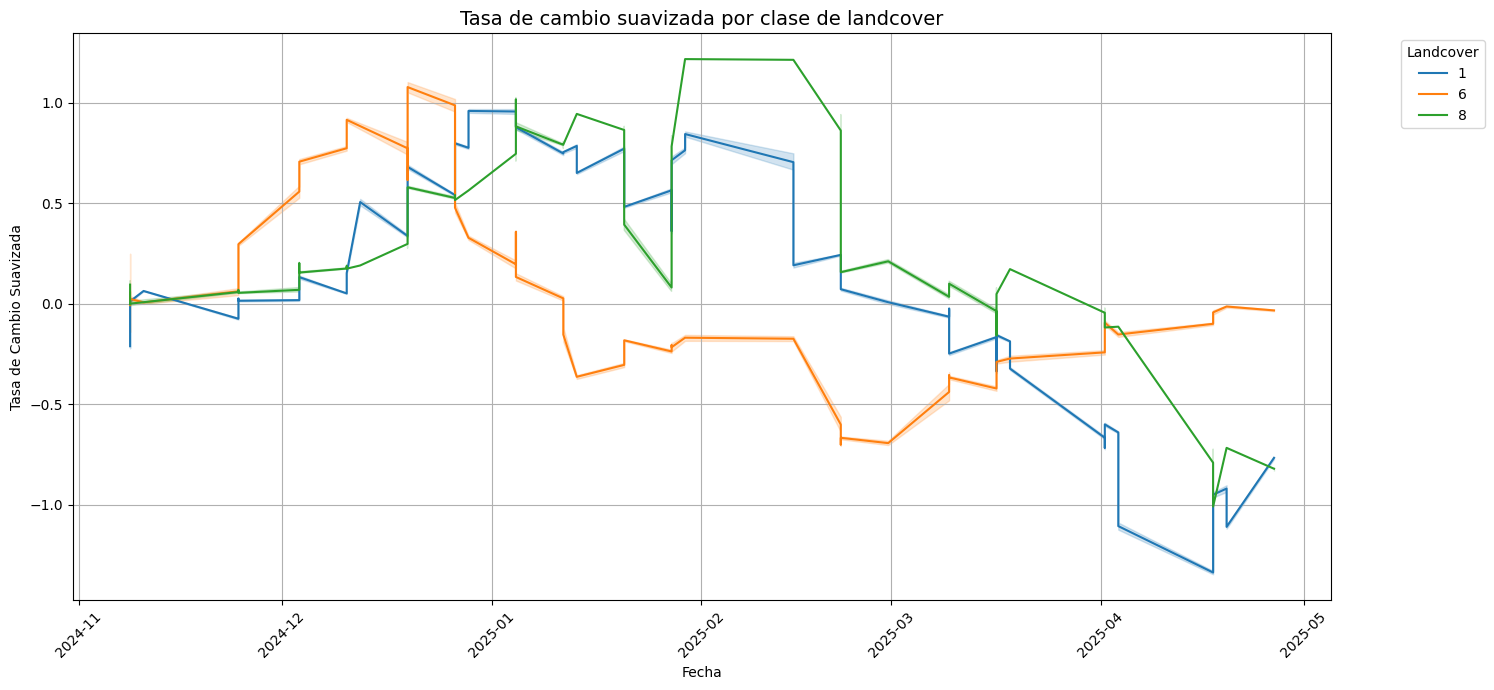

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Asegurar que la columna de fechas esté en formato datetime
df_copia['variable'] = pd.to_datetime(df_copia['variable'])

# Ordenar por fecha
df_copia_grafico = df_copia.sort_values(by='variable')

# Calcular promedio móvil por landcover
df_copia_grafico['tasa_cambio_suavizada'] = (
    df_copia_grafico
    .groupby('landcover')['tasa_cambio']
    .rolling(window=50, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)

# Crear el gráfico
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_copia_grafico, x='variable', y='tasa_cambio_suavizada', hue='landcover', palette='tab10')

# Ajustes estéticos
plt.title("Tasa de cambio suavizada por clase de landcover", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Tasa de Cambio Suavizada")
plt.xticks(rotation=45)
plt.legend(title="Landcover", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
#Filtro por fecha
fecha_menor = datetime.strptime('2025-02-01', '%Y-%m-%d')
fecha_mayor = datetime.strptime('2025-03-01', '%Y-%m-%d')
filtro_fechas = (df_copia['variable'] <= fecha_mayor) & (df_copia['variable'] >= fecha_menor)
df_copia = df_copia[filtro_fechas]
df_copia.head(5)

,landcover,depto,id,variable,value,diff_ndvi,diff_dias,tasa_cambio,tasa_cambio_abs
761181,1,GENERAL ROCA,157,2025-02-21 14:03:06,0.522196,0.105204,24.0,0.438348,0.438348
761182,1,GENERAL ROCA,158,2025-02-21 14:03:06,0.527331,0.057363,24.0,0.239013,0.239013
761183,1,GENERAL ROCA,159,2025-02-21 14:03:06,0.499908,0.029002,24.0,0.120844,0.120844
761185,1,GENERAL ROCA,161,2025-02-21 14:03:06,0.527771,0.011143,24.0,0.046429,0.046429
761188,1,GENERAL ROCA,164,2025-02-21 14:03:06,0.470249,0.092966,24.0,0.387359,0.387359


In [ ]:
df_estadisticas = df_copia.groupby(['id', 'landcover'])['tasa_cambio'].agg(['mean', 'std']).reset_index()
df_estadisticas.head(15)

,id,landcover,mean,std
0,157,1,0.438348,NaN
1,158,1,0.239013,NaN
2,159,1,0.120844,NaN
3,161,1,0.046429,NaN
4,164,1,0.387359,NaN
5,165,1,0.031563,NaN
6,166,1,-0.073927,NaN
7,167,1,-0.244822,NaN
8,169,1,0.979025,NaN
9,170,1,0.237101,NaN


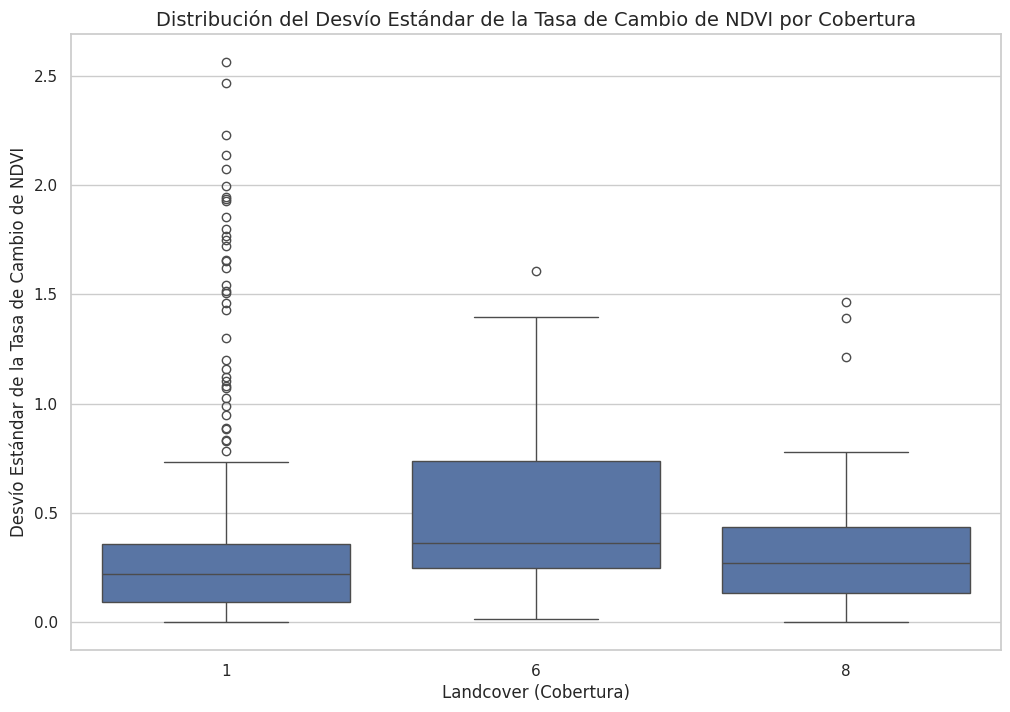

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#estilo
sns.set(style="whitegrid")

#figura
plt.figure(figsize=(12, 8))

# Graficar un boxplot de la tasa de cambio agrupado por 'landcover'
sns.boxplot(x='landcover', y='std', data=df_estadisticas)

# Etiquetas y título
plt.title('Distribución del Desvío Estándar de la Tasa de Cambio de NDVI por Cobertura', fontsize=14)
plt.xlabel('Landcover (Cobertura)', fontsize=12)
plt.ylabel('Desvío Estándar de la Tasa de Cambio de NDVI', fontsize=12)

# Mostrar gráfico
plt.show()

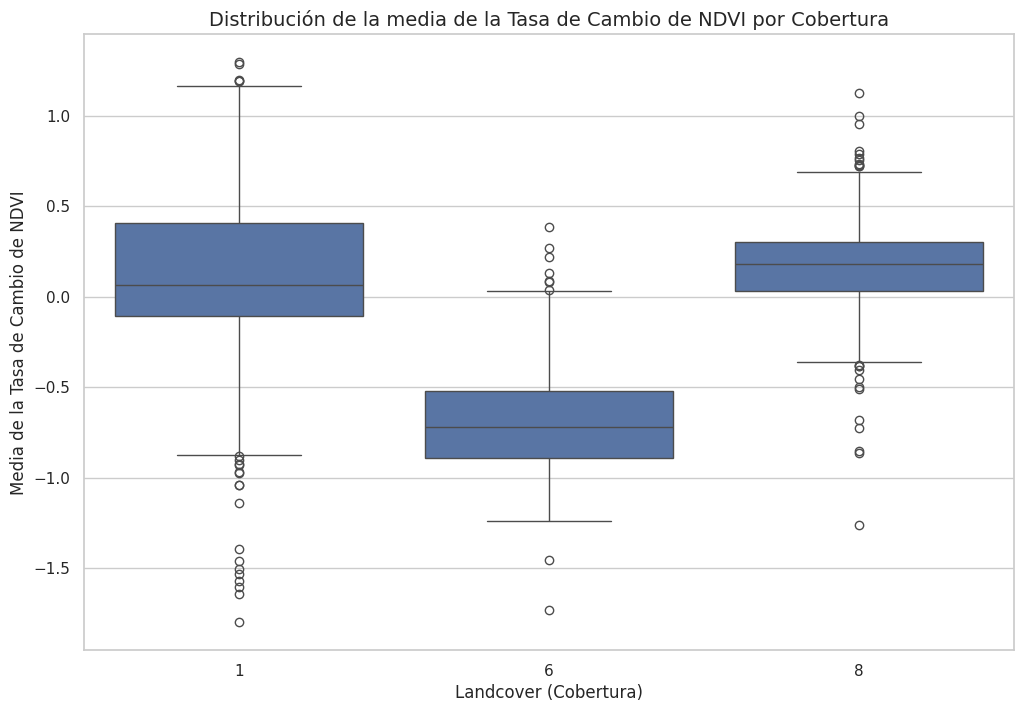

In [ ]:
# Asegurarse de que los gráficos tengan un estilo agradable
sns.set(style="whitegrid")

# Crear la figura
plt.figure(figsize=(12, 8))

# Graficar un boxplot de la tasa de cambio agrupado por 'landcover'
sns.boxplot(x='landcover', y='mean', data=df_estadisticas)

# Etiquetas y título
plt.title('Distribución de la media de la Tasa de Cambio de NDVI por Cobertura', fontsize=14)
plt.xlabel('Landcover (Cobertura)', fontsize=12)
plt.ylabel('Media de la Tasa de Cambio de NDVI', fontsize=12)

# Mostrar gráfico
plt.show()